# What is a decision tree?

A **Decision Tree** is a simple but powerful model that **makes decisions by splitting the data** based on feature values.  
It looks like a **flowchart**: at each node, the model asks a question about the input features, and depending on the answer, it moves down the tree until it reaches a decision (prediction).

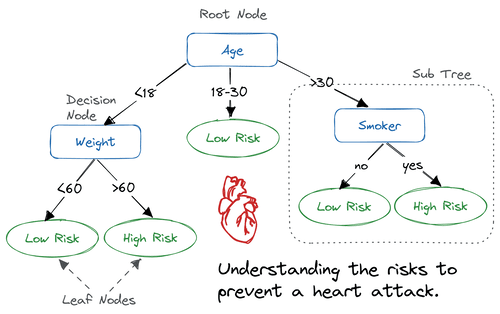

### Learning process of a decision tree

The learning process will go that way:
1. **Start at the root node** (the top).
2. **At each node**:
   - Pick a feature and a threshold value to **split** the data into two groups (best split chosen by a criterion, e.g., Gini impurity or entropy, we will explain later).
3. **Repeat**:
   - Each split creates new nodes.
   - Keep splitting until:
     - All samples at a node are pure (belong to the same class), or
     - Splitting a node would result in the tree exceding a maximum depth.
     - Information gain (we will explain later) from additional splits is less than a threshold.
     - When number of samples in a node is below a threshold.


To customize the learning process of a decision tree we need to define two things:
1. How do we choose what feature to split on at each node and with what threshold?
2. When do we stop splitting a node?


### Classification using a decision tree
To predict a new sample, you just follow the path down the tree based on its features.

### Why use decision trees?

- **Easy to understand and interpret** (you can visualize them).
- **Handles both numerical and categorical data**.
- **No need for feature scaling** (like normalization).
- **Can model complex decision boundaries**.

### Downsides:

- **Overfitting**: A deep tree can memorize the training data and perform badly on new data.
- **Sensitive to small changes** in the data (can result in a very different tree).

(That’s why in practice we often use **ensemble methods** like **Random Forests** to fix this.)

### Choosing what feature to split on

At each node, we want to **choose the feature and threshold** that best **separates the data** into "pure" groups (where each group mostly belongs to one class).

To measure **how pure** a group is, we use metrics like:

- **Entropy** (from Information Theory)
- **Gini Impurity**
- (sometimes others, but these are the most common)

The goal is to **maximize the "gain" in purity** after the split.


###  What is **Entropy**?

- Entropy measures **uncertainty** or **disorder** in the data.
- **High entropy** = messy, lots of mixed classes.
- **Low entropy** = pure, mostly one class.


### Entropy Formula:

For a dataset with $ c $ classes and probabilities $ p_1, p_2, \dots, p_c $:

$$
\text{Entropy} = - \sum_{i=1}^c p_i \log_2(p_i)
$$

Where:
- $ p_i $ = fraction of samples that belong to class $ i $.

Here is a graph representing entropy when there are only two classes:

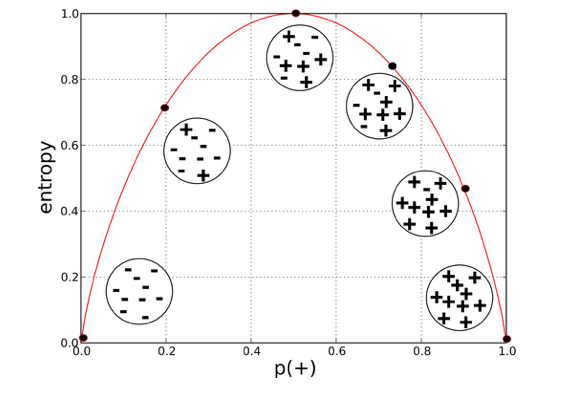

We can see that the function increases from 0 to $\frac{1}{2}$ until it reaches a value of 1 and then it goes down again back to 0. This is why entropy allows us to measure well the purity of a node.


### Example:

Suppose at a node:
- 5 samples are class A
- 5 samples are class B

Then:

$$
p_A = 0.5, \quad p_B = 0.5
$$
$$
\text{Entropy} = - (0.5 \log_2(0.5) + 0.5 \log_2(0.5)) = 1
$$

(maximum disorder)


If instead:
- 9 samples are class A
- 1 sample is class B

Then:

$$
p_A = 0.9, \quad p_B = 0.1
$$
$$
\text{Entropy} = - (0.9 \log_2(0.9) + 0.1 \log_2(0.1)) \approx 0.47
$$

(much lower disorder, closer to pure)


### Information Gain (Choosing the Best Split)

When deciding **where to split**, we compute:

$$
\text{Information Gain} = \text{Entropy (before split)} - \text{Weighted Entropy (after split)}
$$

We **pick the split** that **maximizes the information gain**.


Suppose you are at a node with dataset \( D \).

You split $ D $ into two groups:
- $ D_{\text{left}} $ and $ D_{\text{right}} $

Then, the **Information Gain (IG)** for that split is:

$$
\text{Information Gain} = \text{Entropy}(D) - \left( \frac{|D_{\text{left}}|}{|D|} \text{Entropy}(D_{\text{left}}) + \frac{|D_{\text{right}}|}{|D|} \text{Entropy}(D_{\text{right}}) \right)
$$

where:
- $ |D| $ is the total number of samples
- $ |D_{\text{left}}|, |D_{\text{right}}| $ are the number of samples in each group
- Entropy is computed using the class proportions in each group


### Why do we compute it that way?

1. **Compute Entropy before split**:
   - How "messy" the full set $ D $ is (mix of classes).

2. **Compute Entropy after split**:
   - Compute the entropy separately for the left and right groups.
   - **Weight** each group's entropy by the proportion of samples it has. The more sample a group has, the more it will impact our training so we want its entropy to impact the weighted entropy more.

3. **Subtract**:
   - Information Gain = how much uncertainty (entropy) you removed by doing the split.

If splitting makes the groups purer, you get **high Information Gain**.


### Intuition:
- **Before split**: you have some uncertainty.
- **After split**: you hope each branch becomes more "certain" (pure classes).
- **Information Gain** measures how good the split is at **reducing uncertainty**.

A **perfect split** would make one side all Class A and the other side all Class B → maximal Information Gain.


### Small numerical example:

Suppose at a node you have 10 samples:
- 5 of Class A
- 5 of Class B

Entropy of $ D $:
$$
\text{Entropy}(D) = 1
$$
(very mixed)

Now you split:
- Left branch: 5 samples, all Class A → Entropy = 0
- Right branch: 5 samples, all Class B → Entropy = 0

Weighted Entropy after split:
$$
= \frac{5}{10}(0) + \frac{5}{10}(0) = 0
$$

Information Gain:
$$
= 1 - 0 = 1
$$

Perfect gain!


### Handling categorical features with multiple classes: One Hot Encoding

When you have **categorical features** — like `"color" = red, blue, green` — they are **not numeric**.

Machine learning models (including decision trees) usually expect numbers.  
So we need a way to **convert categories into numbers** without making wrong assumptions.

---

### What happens if we just assign numbers?

If you just do:

| Color | Code |
|:-----:|:----:|
| Red   | 1    |
| Blue  | 2    |
| Green | 3    |

This would **suggest** that:
- "Blue" (2) is somehow *between* "Red" (1) and "Green" (3),
- or that "Green" is *3 times* "Red" — which makes no sense!

This is **wrong for purely categorical variables**.


### One-hot encoding: the correct way

**One-hot encoding** creates **a new binary feature for each class**.

Example for `"Color"`:

| Color  | Color_Red | Color_Blue | Color_Green |
|:------:|:---------:|:----------:|:-----------:|
| Red    | 1         | 0          | 0           |
| Blue   | 0         | 1          | 0           |
| Green  | 0         | 0          | 1           |

Each sample **belongs to exactly one category**, and it’s shown by a 1 in that column.

### Why does it work well for decision trees?

Decision trees **don't care** if a feature is continuous or binary.

At a split, a tree can now say:
- "Is `Color_Red == 1`?"  
  (meaning: Is the color red?)

or
- "Is `Color_Green == 1`?"  
  (Is the color green?)

It treats each category independently without assuming any order between them.

### Handling continuous features

When the feature is **continuous** (e.g., "Height" or "Age"), it's **not** a small set of categories.  
You can't just split into fixed classes — you have to find the **best threshold**.

So the tree will **search for the best split point** (a value like "Height = 175cm") where the Information Gain is maximal.


### How to find the best split for a continuous feature:

Suppose you have a continuous feature $ x $ (like "Height"), and corresponding labels $ y $.

The process:

1. **Sort** the data by the feature $ x $.
2. **Try possible split points** between consecutive values.
3. **For each split**:
   - Split the dataset into left/right groups based on $ x \leq t $ and $ x > t $.
   - Compute the **entropy** of each group.
   - Compute the **weighted average entropy after split**.
   - Compute the **Information Gain** = (entropy before split) − (entropy after split).
4. **Pick the split $ t $** that gives the **highest Information Gain**!

We use this highest information gain, and compare it with the information gains of other features as usual before choosing what feature to split on.


### Example:

Imagine:

| Sample | Height | Label |
|:------:|:------:|:-----:|
| 1      | 150    | 0     |
| 2      | 160    | 0     |
| 3      | 170    | 0     |
| 4      | 180    | 1     |
| 5      | 190    | 1     |
| 6      | 200    | 1     |

Possible split points (midpoints between Heights):
- 155 (between 150 and 160)
- 165 (between 160 and 170)
- 175 (between 170 and 180)
- 185 (between 180 and 190)
- 195 (between 190 and 200)

At each split, we:
- Group data into left and right sides.
- Compute entropies.
- Measure how much uncertainty we reduced (Information Gain).

Then **choose the split** with the best Information Gain.

# Decision tree for regression

Normally, **decision trees** are used for **classification** — predicting discrete classes.

But we can **adapt** the concept for **regression** — predicting a **continuous value** (like "price", "height", etc.).

The key idea:
- **Instead of predicting a class at each leaf**, predict a **number** (a real value).

---

### How regression trees work:

1. At each node, **choose a feature and a threshold** (just like in classification).
2. But instead of maximizing **Information Gain** based on **entropy**,  
   ➔ **We minimize the variance** of the labels.

   Specifically:
   - After the split, the "left" and "right" groups should have **low variance** in their target values.
   - The goal is to find a split that **makes each group as "tight" as possible** around a single value. And this is exactly the meaning of low variance.

3. When reaching a leaf node:
   - The prediction is simply the **mean** (average) of the target values in that leaf.


### Concretely:

Imagine you have:

| Sample | Feature: Size | Target: Price |
|:------:|:-------------:|:-------------:|
| 1      | 30            | 100           |
| 2      | 40            | 150           |
| 3      | 50            | 200           |
| 4      | 60            | 210           |
| 5      | 70            | 220           |

- Possible splits are between sizes: 35, 45, 55, 65.
- For each split, we compute the **MSE** (Mean Squared Error) of predicting the average price on each side.
- **Choose the split** that minimizes total error.

At prediction time:
- A new "Size" goes down the tree based on thresholds,
- Then it reaches a leaf,
- And the tree outputs the **average price** for that leaf. (The average of the labels in that leaf after learning)


### What metric do we minimize for splits?

Most commonly:
- **Mean Squared Error (MSE)**  
  $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2 $

# Random Forest Algorithm

A **single decision tree** is powerful but can **overfit** (memorize the data too well and generalize badly). It is also very sensitive to small changes in the dataset. To solve these issues, we can use tree ensembles algorthims such as the Random Forest algorithms. Let's talk about the core concepts of this method.

### Tree Ensembles
**Tree ensemble** = **many trees working together**.

Idea:
- Instead of one decision tree, **build many trees**.
- Each tree learns something a little different.
- At prediction time, **combine the trees** (e.g., average their outputs for regression, or majority vote for classification).

This **reduces overfitting** and **boosts accuracy**!

This general idea is called **ensemble learning** — **combining multiple models** to make a stronger one.


### Sampling with Replacement ("Bootstrap Sampling")

Before building each tree, we **don't use all the data** exactly as is.  
Instead, we:

- **Sample** examples **randomly with replacement** from the training set.
- This is called a **bootstrap sample**.

**With replacement** means:
- You can pick the **same sample multiple times**.
- Some samples **won't appear at all** in that tree's training data.
  
This gives **different trees** different training sets, which helps create **diversity** between the trees.

The idea:  
> "Don't let all trees see exactly the same data in the same way."


### Random Forest Algorithm

**Random Forest** is a very famous tree ensemble method.

How it works:

1. **For each tree**:
   - Take a **bootstrap sample** of the training data.
   - Build a decision tree **but**:
     - When splitting at each node, **only consider a random subset of the features**, not all features. $k$ features among $n$ are chosen. Often, we choose $k = \sqrt{n}$

2. **At prediction time**:
   - **Aggregate** all the trees:
     - For classification: **majority vote**.
     - For regression: **average** the outputs.

**Why random features at split?**
- Forces trees to be **even more different**.
- Avoids some features always dominating.


**Random forests are powerful because they combine low-bias and low-variance.**


### Why is Random Forest so good?

- Handles **overfitting** very well.
- Works with **high-dimensional** data (many features).
- **Robust** to noise.
- Needs **very little tuning** to perform well.

# Boosted Trees and the XGBoost algorithm


**Boosting** is another way to combine multiple trees — but it's **very different** from Random Forests.

**In Random Forests**:
- Trees are built **independently**.
- They all vote equally.

**In Boosted Trees**:
- Trees are built **sequentially**, one after another.
- Each new tree tries to **fix the mistakes** of the previous ones.
- Final prediction = **weighted sum of all trees**.

### Intuition:
> Build a **series** of small, simple trees.  
> Each tree **corrects** the errors of the ones before it.  
> Slowly, the model gets **better and better**.


### How Boosted Trees work:

At a high level:

1. Start with a **weak model** (e.g., a very simple tree).
2. Look at where it made **mistakes** (wrong predictions).
3. Build another tree that tries to **correct** those mistakes.
4. Add this new tree to the model.
5. Repeat steps 2-4 for many iterations.

At each step:
- **Focus more** on the samples that were **mis-predicted**. They will have a higher probability to be chosen in the next sampling of the dataset.
- **Adjust** predictions by adding the new tree's output.


# ⚡ XGBoost (Extreme Gradient Boosting)

**XGBoost** is a very famous and powerful **optimized implementation** of boosted trees.

It stands out because:
- It's **extremely fast**.
- It uses **gradient boosting** (based on gradients of a loss function).
- It includes tons of engineering tricks like **regularization**, **early stopping**, **sparse-aware algorithms**, and **parallel processing**.

### XGBoost Steps (simplified):

1. Initialize the model (start with simple predictions, like predicting the mean).
2. For each round (iteration):
   - Compute the **gradient** of the loss function (i.e., how much each prediction needs to be corrected).
   - Fit a **new tree** to predict those gradients (small corrections).
   - Update the overall model:
     $$
     \text{New Prediction} = \text{Old Prediction} + \text{Learning Rate} \times \text{New Tree Output}
     $$
   - Optionally **prune** the tree (to prevent overfitting).

3. After many rounds, combine all the small trees to make final predictions.


# 🧠 Why is it called "Gradient" Boosting?

Because at each step, you are **minimizing a loss function**  
by **moving in the direction of the negative gradient** of the loss.

In other words:  
> Each new tree is a **small step downhill** on the error landscape.


### Quick Summary Table

| Aspect | Random Forest | Boosted Trees (XGBoost) |
|:------:|:-------------:|:----------------------:|
| Tree building | Independent | Sequential, each tree fixes the previous |
| Model type | Average of trees | Weighted sum of trees |
| Error handling | Reduce variance (overfitting) | Reduce bias (underfitting) |
| Speed | Fast, easy to parallelize | Slower (but highly optimized in XGBoost) |
| Overfitting risk | Low | Higher (needs regularization and care) |

### Why XGBoost is so good:
- Very **accurate**.
- Has **built-in regularization** (to prevent overfitting).
- Supports **custom loss functions**.
- **Handles missing data** automatically.
- **Extremely optimized** for speed (even for very large datasets).

# Training a basic decision tree classifier using sklearn

Let's use the iris dataset to show how we can training a basic decision tree classifier to classify different kinds of iris flowers.

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.datasets import load_iris
from sklearn import tree

In [9]:
iris = load_iris()

In [10]:
X, y = iris.data, iris.target

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
from sklearn.metrics import accuracy_score
y_predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)

# As percentage:
accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

Accuracy: 100.00%


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2,

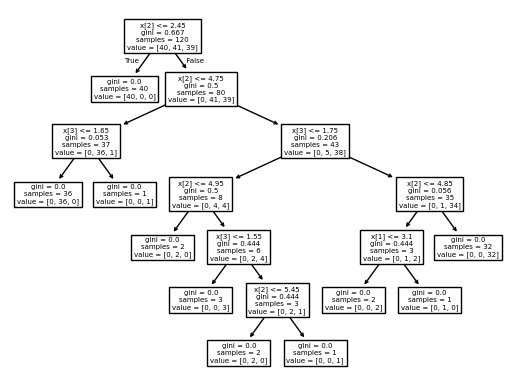

In [16]:
tree.plot_tree(clf)